In [1]:
import json
import logging
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import interpolate

C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [2]:
from config import get_config
from equation2 import get_equation
from solverVer2 import FeedForwardModel

In [3]:
def blackscholes_price(K, T, S, vol, r=0, q=0, callput='call'):
    F = S*np.exp((r-q)*T)
    v = np.sqrt(vol**2*T)
    d1 = np.log(F/K)/v + 0.5*v
    d2 = d1 - v
    try:
        opttype = {'call':1, 'put':-1}[callput.lower()]
    except:
        raise ValueError('The value of callput must be either "call" or "put".')
    price = opttype*(F*norm.cdf(opttype*d1)-K*norm.cdf(opttype*d2))*np.exp(-r*T)
    return price

In [4]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()    
    keys_list = [keys for keys in flags_dict]    
    for keys in keys_list:
        FLAGS.__delattr__(keys)

del_all_flags(tf.flags.FLAGS)

FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_string('f', '', 'kernel')

tf.app.flags.DEFINE_string('problem_name', 'EuropeanCall',
                           """The name of partial differential equation.""")
tf.app.flags.DEFINE_integer('num_run', 1,
                            """The number of experiments to repeatedly run for the same problem.""")
tf.app.flags.DEFINE_string('log_dir', './logs',
                           """Directory where to write event logs and output array.""")

In [5]:
#weight={}
problem_name = FLAGS.problem_name
config = get_config(problem_name)
bsde = get_equation(problem_name, config.dim, config.total_time, config.num_time_interval)

if not os.path.exists(FLAGS.log_dir):
    os.mkdir(FLAGS.log_dir)
path_prefix = os.path.join(FLAGS.log_dir, problem_name)
with open('{}_config.json'.format(path_prefix), 'w') as outfile:
    json.dump(dict((name, getattr(config, name))
                    for name in dir(config) if not name.startswith('__')),
                outfile, indent=2)
logging.basicConfig(level=logging.INFO,
                    format='%(levelname)-6s %(message)s')

for idx_run in range(1, FLAGS.num_run+1):
    tf.reset_default_graph()
    with tf.Session() as sess:
        logging.info('Begin to solve %s with run %d' % (problem_name, idx_run))
        model = FeedForwardModel(config, bsde, sess)
        model.build()
        training_history, graphs = model.train()
        #for i in tf.trainable_variables():
        #    weight[i.name]=sess.run(i)
        #    print(i.name)
        #    print(sess.run(i))
        #   print('\n')
g=graphs

INFO   Begin to solve EuropeanCall with run 1


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:56: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:60: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:115: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:152: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:168: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:171: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:173: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


t: 0
Instructions for updating:
keep_dims is deprecated, use keepdims instead


WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:82: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


t: 1
t: 2
t: 3
t: 4
t: 5
t: 6
t: 7
t: 8



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:102: The name tf.train.piecewise_constant is deprecated. Please use tf.compat.v1.train.piecewise_constant instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:105: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.



WARNING From C:\Users\sy8w\OneDrive\Documents\Projects and Presentation\github\solverVer2.py:107: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

INFO   step:     0,    loss: 2.1216e+02,  elapsed time 191
INFO   step:   100,    loss: 5.2248e+07,  elapsed time 311
INFO   step:   200,    loss: 1.5572e+07,  elapsed time 331
INFO   step:   300,    loss: 3.1007e+08,  elapsed time 344
INFO   step:   400,    loss: 3.0162e+08,  elapsed time 358
INFO   step:   500,    loss: 1.0029e+10,  elapsed time 372
INFO   step:   600,    loss: 4.4520e+09,  elapsed time 389
INFO   step:   700,    loss: 6.4151e+09,  elapsed time 402
INFO   step:   800,    loss: 1.5213e+10,  elapsed time 420
INFO   step:   900,    loss: 8.1584e+09,  elapsed time 433
INFO   step:  1000,    loss: 5.1112e+09,  elapsed time 447
INFO   step:  1100,    loss: 1.6901e+10,  elapsed time 460
INFO   step:  1200,    loss: 2.3429e+09,  elapsed time 473
INFO   step:  1300,    loss: 6.768

forward/f_layer/layer_1/Matrix:0
[[ 0.92381089  0.45406056  1.09783555 -1.1717776  -1.41488303 -0.73617032
  -0.24153254 -0.62604494 -0.24902075  0.99184663 -1.90118494]]


forward/f_layer/layer_1/batch_norm/beta:0
[ 0.48090843  0.47456444  0.37016497 -0.16378023 -0.09864173 -0.57056817
 -0.31897633 -0.5141696  -0.51847786 -0.02251501 -0.03078979]


forward/f_layer/layer_1/batch_norm/gamma:0
[0.557305   0.25623297 0.1871416  0.05878836 0.10848016 0.43128325
 0.15419997 0.61496709 0.26310653 0.19834952 0.00450703]


forward/f_layer/layer_2/Matrix:0
[[ 1.049174    0.22815402  1.3732389   0.88292951  0.32779647 -0.10423709
   0.55110329 -0.78044905 -0.04354773  1.93250399 -0.59594513]
 [-2.09569237  0.38584859  3.44389829  0.10712571  1.82950826 -1.010266
  -0.47129374 -1.68005014  0.01761802 -0.42731891 -0.67508522]
 [-0.10736037  0.42904059  1.06190568 -0.00809091  0.08108563  0.38384737
  -0.19743547 -1.5707144  -0.3316348   1.7240768  -0.77134401]
 [-0.0294525   1.1964036   1.61119261

forward/0/layer_3/batch_norm/beta:0
[ 0.20969384  0.18855764  0.30440222  0.27664243  0.04921609  0.24937684
 -0.30255106 -0.02154228 -0.089809   -0.19826839 -0.2333671 ]


forward/0/layer_3/batch_norm/gamma:0
[0.58979357 0.34267958 0.17402398 0.61506534 0.56484415 0.01023021
 0.21452454 0.4539271  0.00714192 0.12831268 0.09169819]


forward/0/final_layer/Matrix:0
[[-8.86564154e-01]
 [ 9.03700547e-01]
 [ 1.01623068e+00]
 [-1.89677424e+00]
 [ 3.53847938e-01]
 [ 1.28907127e-03]
 [-2.50171645e-01]
 [ 6.62301375e-01]
 [ 5.45622741e-01]
 [ 1.20829751e-01]
 [-1.93833366e-02]]


forward/0/final_layer/batch_norm/beta:0
[0.09734547]


forward/0/final_layer/batch_norm/gamma:0
[0.93435483]


forward/1/path_input_norm/beta:0
[-0.09881412]


forward/1/path_input_norm/gamma:0
[0.36082477]


forward/1/layer_1/Matrix:0
[[-2.52452079 -2.10533853 -0.09735745  0.05080577 -2.99990095 -0.3370275
   2.41331005  0.72613562 -0.84648615  1.66653733 -1.19514932]]


forward/1/layer_1/batch_norm/beta:0
[ 0.090965

forward/2/layer_3/batch_norm/beta:0
[ 0.64101165 -0.06361605 -0.25603962  0.46590385  0.00591156 -0.10670258
  0.22119763  0.28856263 -0.29896914  0.09138026 -0.29914591]


forward/2/layer_3/batch_norm/gamma:0
[0.40502197 0.30053623 0.11936616 0.25060428 0.27584833 0.55136243
 0.17440737 0.44778292 0.08421153 0.29151759 0.19535115]


forward/2/final_layer/Matrix:0
[[ 1.596889  ]
 [ 0.36140021]
 [-0.0638308 ]
 [ 0.61560395]
 [ 0.26466958]
 [-1.59575744]
 [-0.19535375]
 [ 1.67636502]
 [-0.28142032]
 [ 1.38206878]
 [-2.04289446]]


forward/2/final_layer/batch_norm/beta:0
[0.0560659]


forward/2/final_layer/batch_norm/gamma:0
[1.37650404]


forward/3/path_input_norm/beta:0
[0.17022984]


forward/3/path_input_norm/gamma:0
[0.17846754]


forward/3/layer_1/Matrix:0
[[ 0.87052715  0.07265473 -0.72544437 -2.54123191  0.1339578   1.11514109
  -0.98866778  1.07497689 -0.44864298  1.01901533  1.58954396]]


forward/3/layer_1/batch_norm/beta:0
[-0.00455364  0.13880702 -0.03749905 -0.33814784 -0.055

forward/4/layer_3/batch_norm/beta:0
[ 0.48625093  0.00228949 -0.29461193 -0.0893303  -0.03696176  0.67623996
 -0.26247792  0.23613854 -0.30614005  0.037216    0.41915154]


forward/4/layer_3/batch_norm/gamma:0
[0.31667648 0.471522   0.1946222  0.06301418 0.20940142 0.38232981
 0.13216041 0.44069522 0.30229095 0.20838388 0.21554531]


forward/4/final_layer/Matrix:0
[[-3.45383093]
 [ 0.80949317]
 [ 0.86199648]
 [ 0.00548063]
 [-0.98479053]
 [ 1.06059432]
 [ 0.13079945]
 [-0.38663165]
 [ 0.54486386]
 [-0.74799074]
 [-0.50381782]]


forward/4/final_layer/batch_norm/beta:0
[0.00960667]


forward/4/final_layer/batch_norm/gamma:0
[1.85283801]


forward/5/path_input_norm/beta:0
[-0.43732768]


forward/5/path_input_norm/gamma:0
[0.22267231]


forward/5/layer_1/Matrix:0
[[ 0.08498988  0.1417246   1.41731033  1.90495473  0.65932212  1.73513079
   1.02984447 -2.29664155  0.06601383  1.32228714 -0.74066598]]


forward/5/layer_1/batch_norm/beta:0
[ 0.07987645  0.11000557 -0.22099798  0.23133883 -0.1

forward/6/layer_3/Matrix:0
[[-0.53048303  1.00155964 -0.30437165  1.20119989 -0.42222186 -0.0260839
   0.35737725 -1.67871813 -2.04896358 -1.02087762 -2.30859902]
 [-1.21428664 -0.25942268  1.37173686  1.18729028  0.32274215  0.2965765
   0.63880981 -0.23586151 -0.65732694 -1.07279977  0.32214171]
 [ 0.80643373 -0.14814664  0.41852207  1.07957179 -0.14044697  0.44999377
  -1.43027358 -0.33715    -0.7222692  -0.93204348  0.53683528]
 [-0.41801933 -0.49210157 -1.06948853 -0.3898201  -0.93259568 -0.64003689
   0.21083235 -0.72238643  0.01573995  1.15125485 -0.40354822]
 [ 0.17224756 -0.82020574 -2.36996545  0.33086286 -0.26025107  1.23776629
   0.75412585  1.52837519 -0.11207999  0.27963304 -1.61199159]
 [ 1.42492521  0.0425642  -0.05758636 -0.66344507  1.83980071  0.14507786
  -0.61491116 -1.30552523  1.15303213  1.07843458 -0.49973073]
 [-0.74467549 -0.90087899 -0.90638506  0.33347463  2.05048793  0.44868929
  -0.60048155 -0.32270455 -0.00734013  0.62566231 -1.70022282]
 [ 1.00542989 -1

forward/8/layer_2/batch_norm/beta:0
[ 0.40246743  0.33228046 -0.15240947 -0.16264178  0.25800908 -0.04534924
  0.47362347  0.39867607  0.20246457  0.16440698 -0.27745446]


forward/8/layer_2/batch_norm/gamma:0
[0.41014859 0.22527068 0.16546032 0.55353348 0.32317043 0.12279092
 0.49123722 0.45299596 0.02352186 0.25219421 0.12238696]


forward/8/layer_3/Matrix:0
[[-2.10462820e+00 -7.86982451e-01  2.91169756e-01 -7.56775020e-01
   9.95467887e-01 -2.74151904e-01 -1.57343786e+00 -1.08791001e+00
  -3.83065688e-01 -1.17794654e+00  1.96340759e-01]
 [-1.83145051e+00 -9.44762130e-01 -8.78990185e-02  5.62158874e-01
  -9.33660436e-01  7.11819597e-01 -1.00425475e+00 -8.58854118e-01
   6.86762306e-01 -4.47756432e-01  1.22702787e+00]
 [ 5.30576196e-01  2.56159815e-01  1.84250598e+00 -6.81470653e-02
  -7.31912068e-01  1.41948363e+00  1.61203714e+00 -1.10827283e+00
   2.50995654e+00  6.17386165e-01  2.87051626e+00]
 [ 4.51697813e-01 -8.97803047e-01 -1.00861539e+00  1.04731202e+00
  -6.51132645e-01 -2.4

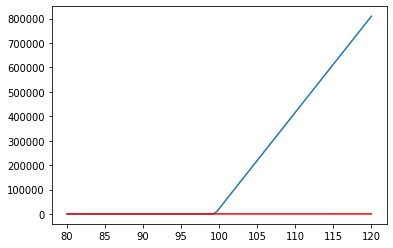

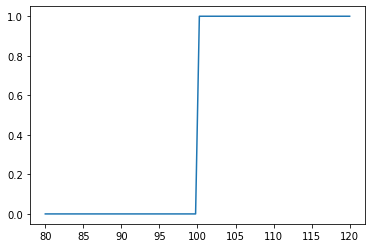

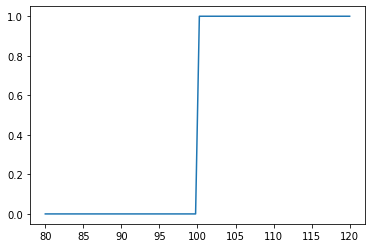

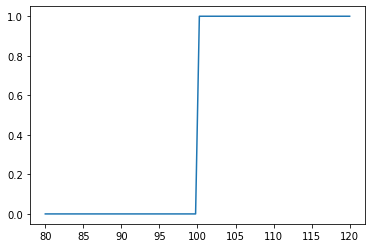

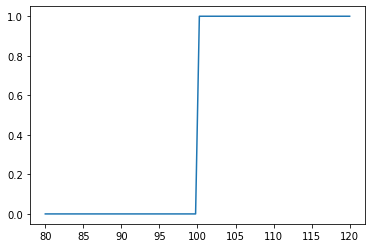

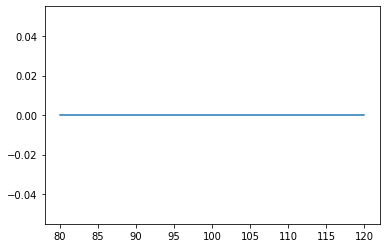

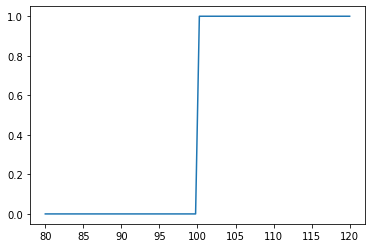

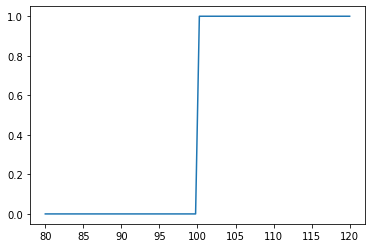

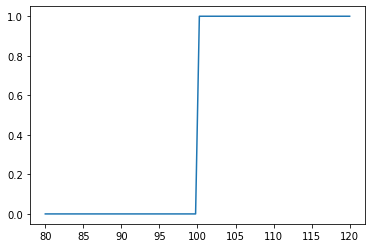

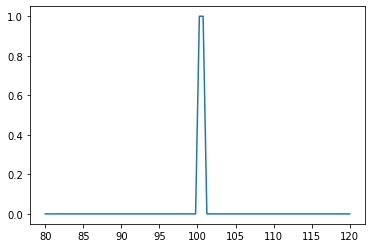

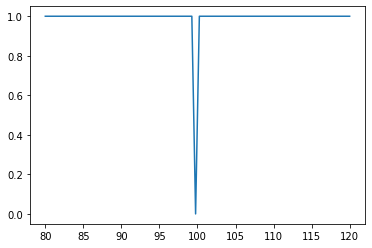

In [8]:
s0=100
k=100
r=0.00
sigma=0.20
T=1

for i in range(len(g)):
    fig, ax = plt.subplots()
    ax.plot(np.linspace(80,120, 82),np.array(g[i]).flatten())
    if i==0:
        ax.plot(np.linspace(80,120, 82),blackscholes_price(k, T, np.linspace(80,120, 82), sigma, r, 0, 'call'),'r',label='Black-Scholes Price')

In [7]:
deltas=[]

for i in range(len(g)):
    deltas.append(interpolate.interp1d(np.linspace(80,120, 82),np.array(g[i]).flatten(),kind='slinear',fill_value='extrapolate'))

In [9]:
g[0]

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[12062.23087533]]),
 array([[31709.448683]]),
 array([[51356.54780991]]),
 array([[70859.56250735]]),
 array([[90316.47271919]]),
 array([[109773.38293103]]),
 array([[129230.29314288]]),
 array([[148687.20335472]]),
 array([[168144.11356656]]),
 array([[187601.02377841]]),
 array([[207057.93399025]]),
 array([[226514.84420209]]),
 array([[245971.754